In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [54]:
file = "../data/RL/PPO_pretraining_loss.csv"
test_file = "../data/RL/PPO_pretraining_test_loss.csv"

test=True

df = pd.read_csv(file)
#df_test = pd.read_csv(test_file)

batch_size = 64

print(df.shape)
number_of_batches = len(df["loss"]) // batch_size
print(number_of_batches)
# avg_loss = []
# avg_loss_test = []

# for i in range(number_of_batches):
#     ticks = np.arange(0, batch_size + 4, 4)

#     y_loss = df["loss"][i*batch_size:(i+1)*batch_size].to_numpy()
#     y_loss_test = df_test["loss"][i*batch_size:(i+1)*batch_size].to_numpy()

#     mean_loss = np.mean(y_loss)
#     mean_loss_test = np.mean(y_loss_test)

#     avg_loss.append(mean_loss)
#     avg_loss_test.append(mean_loss_test)

# x = np.arange(0, number_of_batches, 1)
# print(f"{number_of_batches=}")

# # remove nan values in the avg_loss_test array
# avg_loss_test = [x for x in avg_loss_test if str(x) != 'nan']

# avg_loss = np.array(avg_loss)
# avg_loss_test = np.array(avg_loss_test)

# plt.plot(x, avg_loss, label="train loss")

# #plt.plot(np.arange(0, len(avg_loss_test)), avg_loss_test, label="test loss")
# plt.xlabel("Number of batches")
# plt.ylabel("Loss")
# plt.legend()
# plt.savefig("../plots/RL/evolution_train_loss.png")
# plt.show()

# print(avg_loss_test)
# print(np.mean(avg_loss_test))


(1954, 1)
30


In [6]:
# eval_path = "../eval/{model}/"
def create_df_from_evaluations(eval_path: str) -> pd.DataFrame :

    npz_file = eval_path + "evaluations.npz"
    npz = np.load(npz_file)
    data = {}

    timesteps = npz["timesteps"]
    results = npz["results"]
    ep_length = npz["ep_lengths"]

    result = zip(timesteps, results, ep_length)

    data["timesteps"] = []
    data["mean_reward"] = []
    data["std_reward"] = []
    data["result"] = []

    for step, reward, length in result:

        data["timesteps"].append(step)
        for eval_episode in range(len(reward)):
            data[f"eval_{eval_episode}"] = data.get(f"eval_{eval_episode}", [])
            data[f"eval_{eval_episode}"].append(reward[eval_episode])

            data[f"length_{eval_episode}"] = data.get(f"length_{eval_episode}", [])
            data[f"length_{eval_episode}"].append(length[eval_episode])
        data["mean_reward"].append(np.mean(reward))
        data["std_reward"].append(np.std(reward))
        data["result"].append(reward)
    

    df = pd.DataFrame(data=data)
    return df

In [7]:
def plot_eval_reward(df: pd.DataFrame, model_to_load : str):

    x = df.timesteps
    x = x - x.min()
    x = x // 500.0

    if len(x) != 200:
        return
    
    y = df.mean_reward
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(x, y, label="average episode reward")
    xticks = np.arange(0, 220, 20)

    ax.set_xticks(xticks)

    ax.set_xlabel("evaluation number")
    ax.set_ylabel("average episode reward")

    plt.legend()
    plt.tight_layout()

    #plt.ylim(bottom=0)
    plt.savefig(f"../plots/eval/{model_to_load}.png")

### plot eval

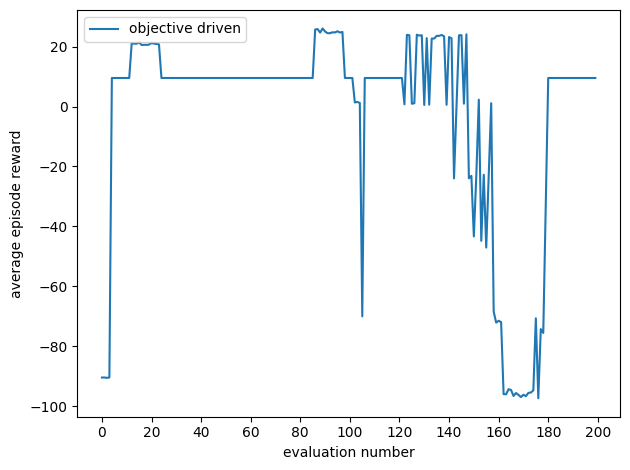

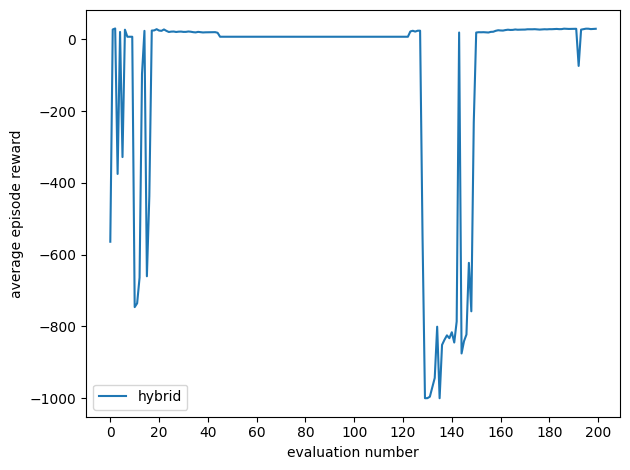

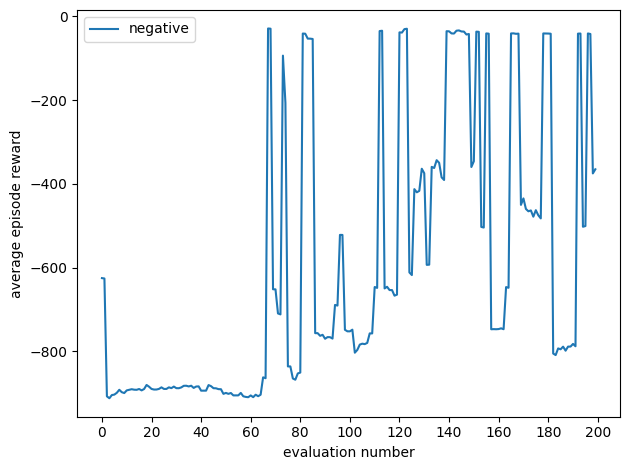

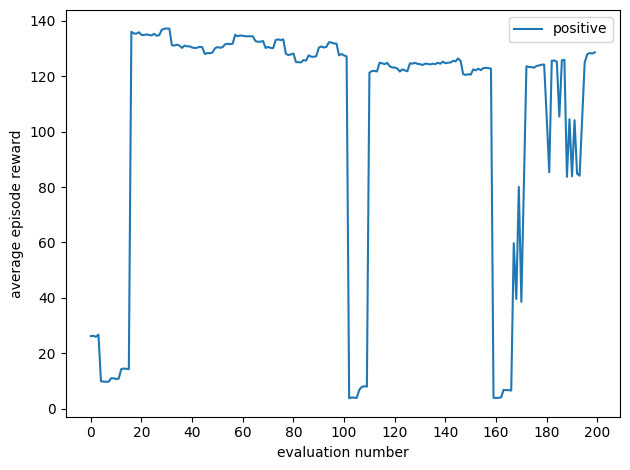

In [27]:
models = [
    "area_reward_2024-08-11-22-56",
    "hybrid_centering_velocity_2024-08-11-18-27",
    "negative_centering_2024-08-11-13-47",
    "PPO_default_reward"
]

mapping = [
    "objective driven",
    "hybrid",
    "negative",
    "positive"
]

for i, model in enumerate(models):
    path = f"../eval/{model}/"

    df = create_df_from_evaluations(eval_path=path)

    x = df.timesteps
    x = x - x.min()
    x = x // 500.0

    y = df.mean_reward

    plt.plot(x, y, label=mapping[i])
    xticks = np.arange(0, 220, 20)

    plt.xticks(xticks)
    plt.xlabel("evaluation number")
    plt.ylabel("average episode reward")
    plt.legend()
    plt.tight_layout()
    #plt.ylim(bottom=0)
    plt.savefig(f"../plots/reward_model/{mapping[i]}.png")
    plt.show()

### Plot metrics of evaluation from best model

model : area_reward_2024-08-11-22-56
model : hybrid_centering_velocity_2024-08-11-18-27
model : negative_centering_2024-08-11-13-47
model : PPO_default_reward


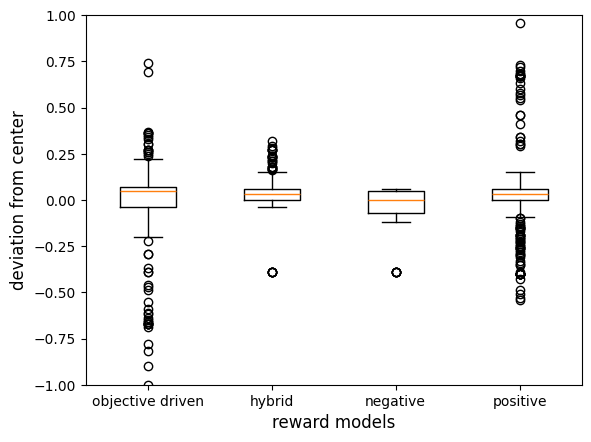

In [50]:
dfs =[]
labels = []
for i, model in enumerate(models):

    path = f"../eval/{model}/metrics.csv"
    df = pd.read_csv(path)
    print(f'model : {model}')
    dfs.append(df)
    labels.append(mapping[i])
    
    #print(df.head())
    #plot_metrics(df, None, mapping[i])
    #break

data = [df['distance_to_middle_line'] for df in dfs]

plt.boxplot(data, labels=labels)
#plt.title("Comparison of reward models in terms of centering of the vehicle")
plt.xlabel("reward models", fontsize=12)
plt.ylabel("deviation from center", fontsize=12)
plt.ylim(bottom=-1.0, top=1.0)
plt.savefig("../plots/reward_model/comparison_centering.png")
plt.show()
    


### Is destination achieved

model : area_reward_2024-08-11-22-56
model : hybrid_centering_velocity_2024-08-11-18-27
model : negative_centering_2024-08-11-13-47
model : PPO_default_reward
[0    0.65
1    0.45
2    0.55
3    0.53
4    0.31
5    0.57
6    0.59
7    0.39
8    0.32
9    0.50
Name:  objective_distance, dtype: float64, 0    0.19
1    0.16
2    0.17
3    0.19
4    0.19
5    0.17
6    0.18
7    0.19
8    0.17
9    0.18
Name:  objective_distance, dtype: float64, 0    0.16
1    0.15
2    0.16
3    0.20
4    0.15
5    0.16
6    0.20
7    0.20
8    0.18
9    0.20
Name:  objective_distance, dtype: float64, 0    0.20
1    0.16
2    0.19
3    0.26
4    0.27
5    0.26
6    0.25
7    0.23
8    0.24
9    0.21
Name:  objective_distance, dtype: float64]


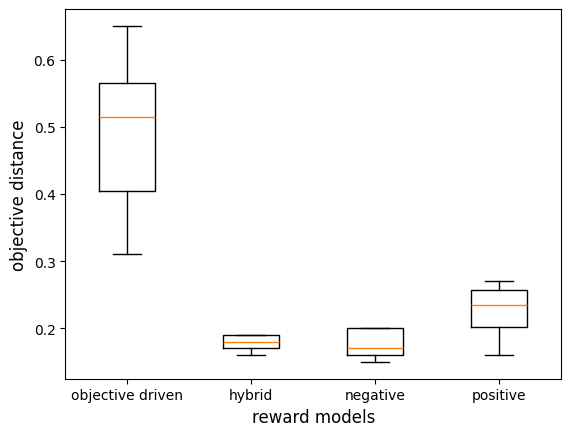

In [51]:
dfs =[]
labels = []
for i, model in enumerate(models):

    path = f"../eval/{model}/episode.csv"
    df = pd.read_csv(path)
    print(f'model : {model}')
    dfs.append(df)
    labels.append(mapping[i])
    
    #print(df.head())
    #plot_metrics(df, None, mapping[i])
    #break
data = []
for df in dfs:
    # Remove curly braces, trailing parenthesis, and any leading/trailing whitespace
    df[' objective_distance'] = df[' objective_distance'].str.replace(r'[{}()]', '', regex=True).str.strip()
    
    # Convert the cleaned strings to floats
    df[' objective_distance'] = df[' objective_distance'].astype(float)
    
    # Append cleaned dataframe to the list
    data.append(df[' objective_distance'])

print(data)

plt.boxplot(data, labels=labels)
#plt.title("Comparison of reward models in terms of objective distance")
plt.xlabel("reward models", fontsize=12)
plt.ylabel("objective distance", fontsize=12)
#plt.ylim(bottom=-1.0, top=1.0)
plt.savefig("../plots/reward_model/comparison_distance.png")
plt.show()
    
